# <center>Data Mining Project Code</center>

** **
## <center>*05 - Density-based Notebook*</center>

** **

In this notebook, we continue our customer segmentation using four different Density-Based clustering methods: DBScan, HDBSCAN, Meanshift and OPTICS. Each algorithm is going to be applied to different datasets which suffered from different transformations.


The members of the `team` are:
- Ana Farinha  - 20211514
- António Oliveira - 20211595
- Mariana Neto - 20211527
- Salvador Domingues - 20240597


# Table of Contents

<a class="anchor" id="top"></a>


1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data) <br><br>



# 1. Importing Libraries & Data

In [1]:
# Data manipulation
import pandas as pd

# Clustering algorithms
from sklearn.cluster import DBSCAN, HDBSCAN, MeanShift, OPTICS

# Visualizations
import matplotlib.pyplot as plt

# Utils
from functions import *

In [2]:
# change data file
data = pd.read_csv('data/data_capped.csv', index_col = "customer_id")
data.head(3)

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,...,20_23h,customer_region,last_promo,payment_method,promo_DELIVERY,promo_DISCOUNT,promo_FREEBIE,pay_CARD,pay_CASH,is_repeat_customer
customer_id,,,,,,,,,,,,,,,,,,,,,
1b8f824d5e,18.0,2.0,5.0,1.0,0,1,0.00,0.00,0.0,0.0,...,0.0,2360,DELIVERY,DIGI,1,0,0,0,0,1
5d272b9dcb,17.0,2.0,2.0,2.0,0,1,12.82,6.39,0.0,0.0,...,0.0,8670,DISCOUNT,DIGI,0,1,0,0,0,1
f6d1b2ba63,38.0,1.0,2.0,2.0,0,1,9.20,0.00,0.0,0.0,...,0.0,4660,DISCOUNT,CASH,0,1,0,0,1,1


In [3]:
num_variables = ['customer_age', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'CUI_American', 'CUI_Asian',
       'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese',
       'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian',
       'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER',
       'CUI_Street Food / Snacks', 'CUI_Thai', 'days_between', 'total_orders',
       'avg_order_hour', 'total_spend', 'avg_spend_prod',
       '1_7h', '8_14h', '15_19h', '20_23h']

# 2. Density-based

<a href="#top">Top &#129033;</a>

## 2.1 DBScan

In [4]:
dbscan = DBSCAN(eps=15, min_samples=5)  
data['dbscan_cluster_1'] = dbscan.fit_predict(data[num_variables])
data['dbscan_cluster_1'].value_counts()

dbscan_cluster_1
 0    31626
-1      192
 1       10
Name: count, dtype: int64

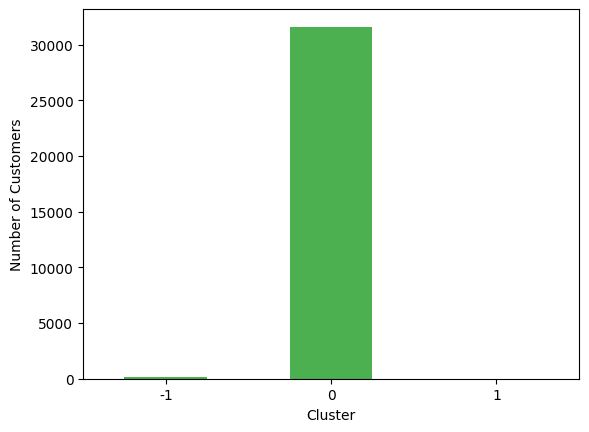

In [5]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = data[num_variables + ['dbscan_cluster_1']].groupby(['dbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## 2.2 HDBScan

In [6]:
hdbscan = HDBSCAN(min_cluster_size=10)
data['hdbscan_cluster_1'] = dbscan.fit_predict(data[num_variables])
data['hdbscan_cluster_1'].value_counts()

hdbscan_cluster_1
 0    31626
-1      192
 1       10
Name: count, dtype: int64

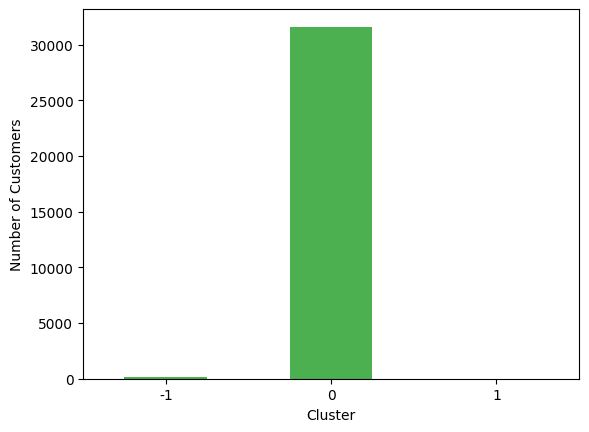

In [7]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = data[num_variables + ['hdbscan_cluster_1']].groupby(['hdbscan_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## 2.3 Meanshift

In [8]:
meanshift = MeanShift(bin_seeding = True)
data['meanshift_cluster_1'] = meanshift.fit_predict(data[num_variables])
data['meanshift_cluster_1'].value_counts()

meanshift_cluster_1
0    31828
Name: count, dtype: int64

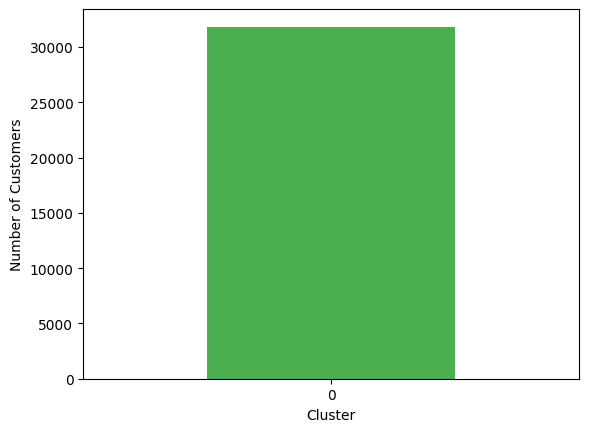

In [9]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = data[num_variables + ['meanshift_cluster_1']].groupby(['meanshift_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()

## 2.4 OPTICS

In [10]:
optics = OPTICS(min_samples=30)
data['optics_cluster_1'] = optics.fit_predict(data[num_variables])
data['optics_cluster_1'].value_counts()

optics_cluster_1
0    31828
Name: count, dtype: int64

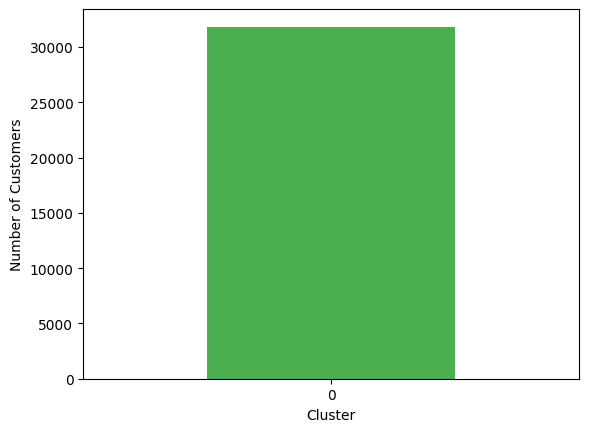

In [11]:
# Create a bar chart of the number of customers in each cluster
cluster_counts = data[num_variables + ['optics_cluster_1']].groupby(['optics_cluster_1']).size()
ax = cluster_counts.plot(kind='bar', color='#4CAF50')

# Add labels to the x and y axes
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)

# Show the plot
plt.show()